In [70]:
import numpy as np

In [71]:
class LinearRegression:
    def __init__(self, X, y, lr=0.001, benchmark=0.0001, batch_size=64):
        self.X = X
        self.y = y
        self.lr = lr
        self.benchmark = benchmark
        self.batch_size = batch_size
        
        self.w = np.random.randn(self.X.shape[1])
    
    def predict(self, X):
        return np.dot(X, self.w)
    
    def error(self, X, y):
        return abs((self.predict(X) - y));
    
    def calc_grad(self, X, y):
        return np.dot(X.T, (y - self.predict(X)))
    
    def update_weights(self, grad):
        self.w += self.lr * grad
    
    def train(self):
        prev_error = self.error(self.X, self.y).mean()
        
        cnt_err_bigger_than_prev = 0;
        
        while(True):
            
            indx = np.random.permutation(self.X.shape[0])
            
            X_prem = self.X[indx]
            y_prem = self.y[indx]
            
            for i in range(0, self.batch_size, 1):
                X_batch = X_prem[i:i+self.batch_size]
                y_batch = y_prem[i:i+self.batch_size]
                grad = self.calc_grad(X_batch, y_batch)
                self.update_weights(grad)
            
            err = self.error(self.X, self.y).mean()
            
            print("p err: ", prev_error)
            print("err: ", err)
            
            if(prev_error - err < self.benchmark and prev_error > err):
                prev_error = err
            else:
                self.lr -= 0.00001
                cnt_err_bigger_than_prev += 1
                
            if(cnt_err_bigger_than_prev > 10):
                break;        

In [72]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

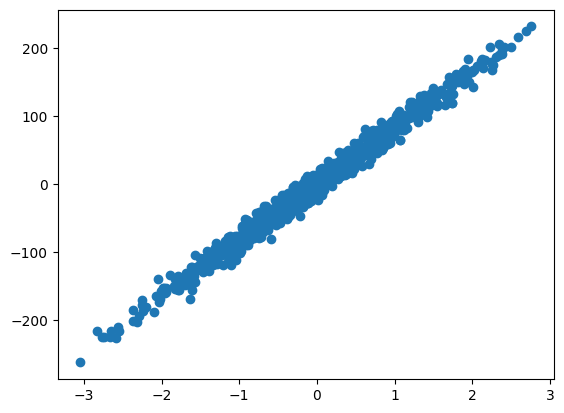

In [73]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [74]:
print("tr X: ", X)
print("tr y: ", y)

tr X:  [[-2.55298982e+00]
 [ 1.76405235e+00]
 [-1.79132755e+00]
 [-1.21407740e+00]
 [-1.44494020e+00]
 [ 1.95069697e-01]
 [ 1.48051479e+00]
 [ 1.88778597e-01]
 [-6.67712721e-01]
 [ 6.16886554e-01]
 [-4.66845546e-01]
 [-7.19604389e-01]
 [ 8.29986159e-01]
 [-1.10438334e+00]
 [ 1.29782527e+00]
 [ 3.13067702e-01]
 [ 8.41631264e-01]
 [ 1.38526155e+00]
 [ 9.94544570e-02]
 [-1.54158740e+00]
 [-3.61599281e-01]
 [-7.88669255e-01]
 [ 4.02341641e-01]
 [-5.09843242e-01]
 [ 1.11701629e+00]
 [ 1.02943883e+00]
 [-5.02816701e-01]
 [-6.28087560e-01]
 [-4.22571517e-02]
 [ 1.64227755e-01]
 [-9.93123611e-01]
 [ 9.36398544e-01]
 [-8.15791542e-01]
 [-5.53525480e-02]
 [ 2.79095764e-01]
 [ 3.70825001e-01]
 [-1.44566817e-01]
 [-7.29044659e-01]
 [ 9.20858824e-01]
 [-4.64337691e-01]
 [-9.32789042e-01]
 [-5.00840943e-02]
 [-5.06816354e-01]
 [-1.93627981e+00]
 [ 1.99795608e+00]
 [-3.65055217e-01]
 [-1.28455230e+00]
 [ 1.46935877e+00]
 [-4.37820045e-01]
 [-1.10489405e-01]
 [ 1.18137860e+00]
 [ 1.78587049e+00]
 [-1.

In [75]:
model = LinearRegression(X=X, y=y, lr=0.001, benchmark=0.01)

In [76]:
model.train();

p err:  64.39608540572804
err:  7.881744584858318
p err:  64.39608540572804
err:  7.894079834658358
p err:  64.39608540572804
err:  7.925199771256224
p err:  64.39608540572804
err:  7.922995045052936
p err:  64.39608540572804
err:  7.883652944023473
p err:  64.39608540572804
err:  7.881525471276069
p err:  64.39608540572804
err:  7.90469436053326
p err:  64.39608540572804
err:  7.948935547475048
p err:  64.39608540572804
err:  7.882706943201132
p err:  64.39608540572804
err:  7.887176308578386
p err:  64.39608540572804
err:  7.923065613047682


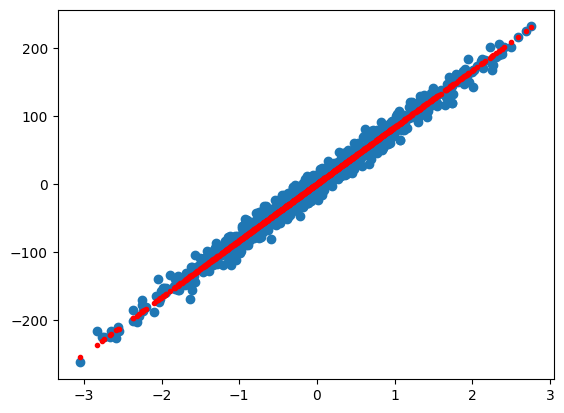

In [77]:
pred = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, pred, marker='.', color='red')